<p style="text-align: right">
  <img src="../images/dtlogo.png" alt="Logo" width="200">
</p>

# 💻 PID controller homework

In this exercise you will have to write the code for a PID controller tasked to command the angular speed of your Duckiebot to drive it from a given initial condition to a lateral position of $y_{ref} = 0.2 \text{m}$. 

Your robot will have to rely on its own odometry to estimate its current position.

**Note**: the function(s) used to compute the odometry will be taken from your previous answers in the [odometry activity](../04-Odometry/odometry_activity.ipynb). Make sure you're happy about them, too!

The Duckiebot's speed is constant and given: $v_0 = 0.2$. 

May the duck be with you!

⚠️ ***WARNING:***
- DO NOT CHANGE THE NAME OF THE FOLLOWING FUNCTION
- DO NOT CHANGE THE ARGUMENTS OF THE FUNCTION
- DO NOT CREATE NEW CODE CELLS, THEY WILL NOT BE CONSIDER

In [3]:
import numpy as np

# write the PID controller function for y postion control.

# **DO NOT CHANGE THE NAME OF THE FUNCTION**, it will break things

def PIDController(
    v_0,
    y_ref,
    y_hat, 
    prev_e_y, 
    prev_int_y, 
    delta_t):
    """
    Args:
        v_0 (:double:) linear Duckiebot speed (given).
        y_ref (:double:) reference lateral pose
        y_hat (:double:) the current estiamted pose along y.
        prev_e_y (:double:) tracking error at previous iteration.
        prev_int_y (:double:) previous integral error term.
        delta_t (:double:) time interval since last call.
    returns:
        u (:list:) 1x2 array of commands for the Duckiebot: [v0, omega] 
        current_e (:double:) current tracking error (automatically becomes prev_e_y at next iteration).
        current_int_e (:double:) current integral error (automatically becomes prev_int_y at next iteration).
    """
    
    # error
    e_y = y_ref - y_hat

    # integral of the error
    e_int_y = prev_int_y + e_y*delta_t  
    
    # antiwindup
    e_int_y = max(min(e_int_y,0.5),-0.5)

    # derivative of the error
    e_der_y = (e_y - prev_e_y)/delta_t

    # PID parameters sim (v0 = 0.2, yref = 0.2 then -0.1)

    # PID parameters robot (v0=0.2, yref = 0.1 then -0.2)
    Kp_y= 9
    Ki_y= 0.05
    Kd_y= 12
    
    # PID controller for omega
    omega = Kp_y*e_y + Ki_y*e_int_y + Kd_y*e_der_y
    
    u = [v_0, omega]
    
    # Debugging 
    # print(f"\n\nDelta time : {delta_t} \nE : {e_y} \ne_int : {e_int_y} \ne_der : {e_der_y} \nU : {u} \ny_hat: {y_hat} \ny_ref: {y_ref}")

    
    return u, e_y, e_int_y


### Sanity Check

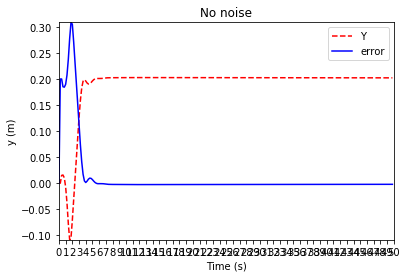

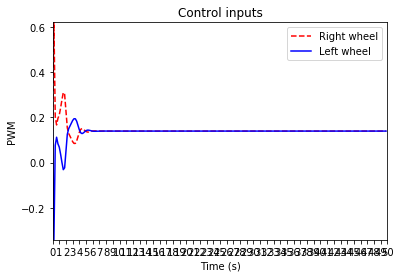

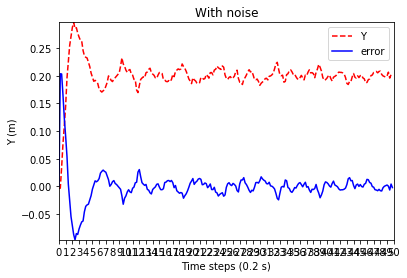

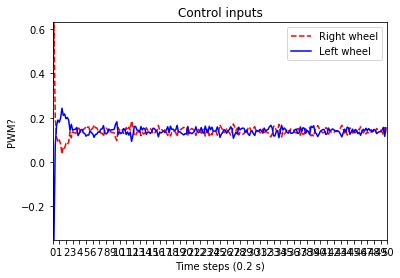

In [4]:
import sys
sys.path.append('../')
from unit_test import UnitTestPositionPID

# Write here the values of the kinematics parameters you calculated during the activities.
# This test will give you an idea of the behavior of the controller you wrote above.
# Try to play with the parameters, change R, the baseline all the PID variables,
# What change in the resulting graphs? Why?

R = 0.0318
baseline = 0.1
gain = 0.6
trim = 0.0
v_0 = 0.2
y_ref = 0.2

# unit test input R, baseline, v_0, gain, trim, PIDController
unit_test = UnitTestPositionPID(R, baseline, v_0, y_ref, gain, trim, PIDController) 
unit_test.test()


## Testing instructions and outcome examples

Here are some examples of stable outcomes (not necessarily the best you can get):

### 💻 Simulation 

1. Write the controller above, save this page (`Ctrl-S`), run:


        dts exercise test --sim


2. Click on the "PID Exercise" icon on the VNC desktop

3. Bring up the interaction panel (it might be hidden behind RVIZ, highlight it through the shortcut on the bottom bar of VNC) and type the desired reference position $y_{ref}$ (in **meters**) and Duckiebot linear speed ($v_0$). 

4. Press on `Send Commands` to start, `Stop` to stop. 

5. `Ctrl-C` on the computer terminal used to launch the simulator to close the instance. 

<figure>
  <div style="text-align:center;">
  <img src="../images/pid-control/pid-lateral-sim-good.png" alt="pid-lateral-sim-1" style="width: 300px;"/>
  <figcaption> Simulation, lateral PID control. $v_{0} = 0.2$, $y_{ref} = [0.2, -0.1]$. </figcaption>
  </div>
</figure>

### 🚙 Duckiebot

0. Make sure your Duckiebot is powered on and connected to the network.

1. Write the controller above, save this page (`Ctrl-S`), run:


        dts exercise test -b ROBOTNAME


2. Click on the "PID Exercise" icon on the VNC desktop

3. Bring up the interaction panel (it might be hidden behind RVIZ, highlight it through the shortcut on the bottom bar of VNC) and type the desired reference position $y_{ref}$ (in **meters**) and Duckiebot linear speed ($v_0$). 

4. Press on `Send Commands` to start, `Stop` to stop. 

5. `Ctrl-C` on the computer terminal used to launch the simulator to close the instance. 

<figure>
  <div style="text-align:center;">
  <img src="../images/pid-control/pid-lateral-real-good.png" alt="pid-lateral-real-1" style="width: 300px;"/>
  <figcaption> Duckiebot, lateral PID control. $v_{0} = 0.2$, $y_{ref} = [0.2, -0.2, 0.2]$. </figcaption>
  </div>
</figure>

# Local evaluation and remote submission of your homework exercise


You must submit this homework for evaluation if you are pursuing a verified track in the MOOC.

## Local evaluation

You can evaluate your submission locally by following these steps:

1. Open a terminal, navigate to the exercise folder and run:


        dts challenges evaluate
        

2. The result of the simulation can be visualized in realtime at the link printed by the evaluator:

<figure>
  <div style="text-align:center;">
  <img src="../images/pid-exercise/screen-aido-eval.png" alt="pid-lateral-real-1" style="width: 500px;"/>
  <figcaption> Visualize the simulation at the link printed during the evaluation. </figcaption>
  </div>
</figure>

3. The evaluation output is saved locally at the end of the evaluation process. 

## Remote submission

You can submit your agent for evaluation through: 

1. Open a terminal, navigate to the exercise folder and run:


        dts challenges submit
        

2. The result of the submission can be visualize on the AIDO challenges website:

<figure>
  <div style="text-align:center;">
  <img src="../images/pid-exercise/screen-aido-submission.png" alt="pid-lateral-real-1" style="width: 500px;"/>
  <figcaption> Visualize the results of the submission at the link printed after the end of the submission. </figcaption>
  </div>
</figure>

